In [1]:
!python --version

Python 3.6.5


In [17]:
# Importamos las librerías permitidas para la realización del proyecto
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import pandas as pd

## Procesamiento inicial del conjunto de datos
Se leerán los datos de un archivo ".npy" que es un fichero que contiene datos compatibles con numpy. También se realizara la divisón de los datos en 2 subconjuntos quedando distribuidos de la siguiente manera:

| Subconjunto          | Proporción del conjunto original |
| -------------------- | -------------------------------- |
| Entrenamiento        | 80%                              |
| Validación y pruebas | 20%                              |

## Descripción del conjunto de datos

| No | Nombre Columna | Descripción | Dimensional |
| -- | -------------- | ----------- | ----------- |
| 0  | SalePrice      | Precio de la casa. Objetivo de predicción, **Y**.| $ |
| 1  | OverallQual    | Calidad de los materiales y acabados de la construcción. Escala de 1 - 10, donde 10 es lo mejor. | -- |
| 2  | 1stFlrSF       | Metros cuadrados de construcción en primer nivel. | mts<sup>2</sup> |
| 3  | TotRmsAbvGrd   | Habitaciones con un grado alto. Excluyendo los baños. | -- |
| 4  | YearBuilt      | Año de construcción | -- |
| 5  | LotFrontAge    | Medida de largo de casa conectado a la calle. | ft |


In [106]:
# Nombres de las columnas
data_columns = {0: "SalePrice", 
                    1: "OverallQual", 
                    2: "1stFlrSF", 
                    3: "TotRmsAbvGrd", 
                    4: "YearBuilt", 
                    5: "LotFrontAge"}

In [107]:
# Mostrar las dimensiones de un conjunto de datos
def print_dimensions(data_title, data):
    print(f"{data_title}".center(30, "-"))
    print(f"Cantidad de filas: {data.shape[0]}")
    print(f"Cantidad de columnas: {data.shape[1]}")
    print("".center(30,"-"))

# Función que retorna el conjunto de datos de entrenamiento y validación
def data_train_test_split(data, test_size=0.8):
    subset_index = int(data.shape[0] * test_size)
    return data[:subset_index,], data[subset_index:,]

In [108]:
# Cargar los datos originales y aplicar la función para separar el conjunto de entrenamiento y validación.
original_data = np.load('data/proyecto_training_data.npy')
# Replace NaN with 0.0
original_data = np.nan_to_num(original_data)
train_data, valid_data = data_train_test_split(original_data, test_size=0.8)
print_dimensions("Original", original_data)
print_dimensions("Train data", train_data)
print_dimensions("Valid data", valid_data)

-----------Original-----------
Cantidad de filas: 1460
Cantidad de columnas: 6
------------------------------
----------Train data----------
Cantidad de filas: 1168
Cantidad de columnas: 6
------------------------------
----------Valid data----------
Cantidad de filas: 292
Cantidad de columnas: 6
------------------------------


In [109]:
# Función para describir los datos en cada columna
def data_describe(data, columns_names):
    '''
    Esta función describe los datos de un arreglo multidimensional en numpy.
    Inputs:
        data -> matriz numpy de forma NxM
        columns_names -> diccionario que contiene en cada llave un entero y corresponde al número de columna de la matriz.
    Outputs:
        Se imprimen los siguientes número significativos de cada columna.
        - media
        - valor máximo
        - valor mínimo
        - rango (peak to peak)
        - desviación estandar
    '''
    for ind, column_name in columns_names.items():
        print(f"{column_name}".center(50, "-"))
        print(f"              Media: {np.mean(data[:,ind])}")
        print(f"       Valor máximo: {np.amax(data[:,ind])}")
        print(f"       Valor mínimo: {np.amin(data[:,ind])}")
        print(f"Desviación estandar: {np.std(data[:,ind])}")
        print(f"  Rango(PeakToPeak): {np.ptp(data[:,ind])}")

In [110]:
# Descripción del conjunto de datos original
data_describe(original_data, data_columns)

--------------------SalePrice---------------------
              Media: 180921.19589041095
       Valor máximo: 755000.0
       Valor mínimo: 34900.0
Desviación estandar: 79415.29188606751
  Rango(PeakToPeak): 720100.0
-------------------OverallQual--------------------
              Media: 6.0993150684931505
       Valor máximo: 10.0
       Valor mínimo: 1.0
Desviación estandar: 1.3825228366585953
  Rango(PeakToPeak): 9.0
---------------------1stFlrSF---------------------
              Media: 1162.626712328767
       Valor máximo: 4692.0
       Valor mínimo: 334.0
Desviación estandar: 386.45532230228963
  Rango(PeakToPeak): 4358.0
-------------------TotRmsAbvGrd-------------------
              Media: 6.517808219178082
       Valor máximo: 14.0
       Valor mínimo: 2.0
Desviación estandar: 1.624836553698191
  Rango(PeakToPeak): 12.0
--------------------YearBuilt---------------------
              Media: 1971.267808219178
       Valor máximo: 2010.0
       Valor mínimo: 1872.0
Desviació

## Histograma de cada variable

In [144]:
# Plot distributions
def plotting_dist(data, rows, cols, names, graph_type="dist", coefs=None, y=0,size=(15,5)):
    fig, ax = plt.subplots(rows, cols, figsize=size, sharex=False)
    sns.despine(left=True)
    i = 0
    for row in range(rows):
        for col in range(cols):
            if graph_type=="dist":
                sns.distplot(data[:,i],ax=ax[row, col]).set_title(names[i])
            elif graph_type=="scatter":
                if i == 5:
                    pass
                else:
                    sns.scatterplot(x=data[:,i+1], y=data[:,y], ax=ax[row, col]).set_title(f"r={coefs[i]}")
            i += 1
    plt.setp(ax, yticks=[])
    plt.tight_layout()

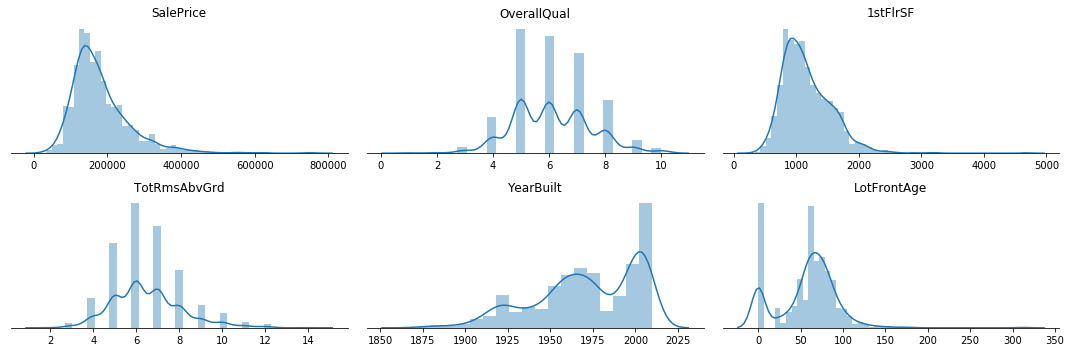

In [117]:
plotting_dist(original_data, 2, 3, data_columns)

## Cálculo de correlación

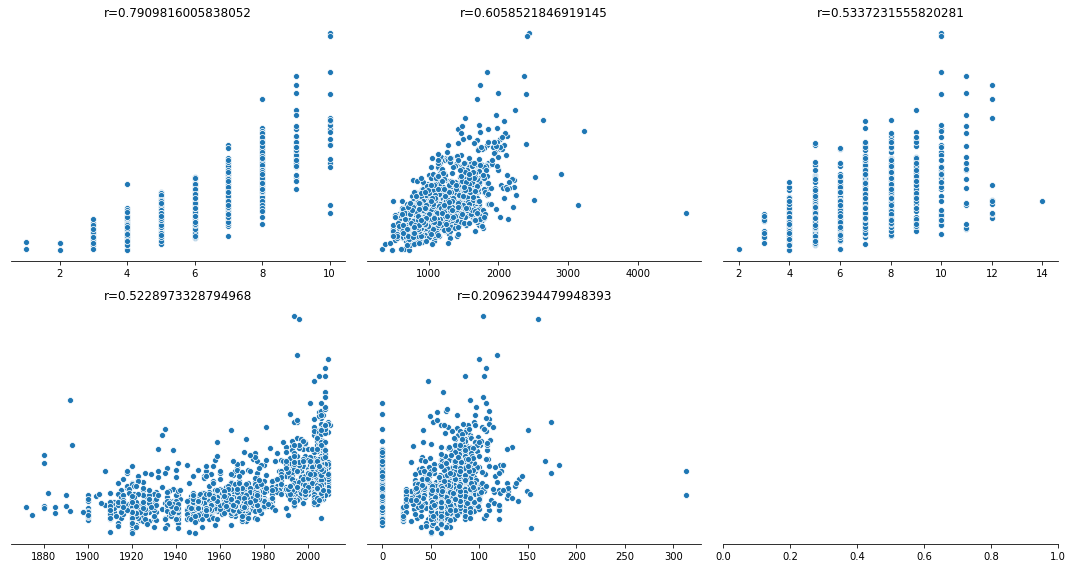

In [146]:
def correlacion(data, interest_column=0):
    columns = data.shape[1]
    coefs = []
    for i in range(1,columns):
        coefs.append(np.amin(np.corrcoef(data[:,0], data[:,i])))
    return coefs
coefs = correlacion(original_data)
plotting_dist(original_data, 2, 3, names=data_columns, graph_type="scatter", coefs=coefs, y=0, size=(15,8))